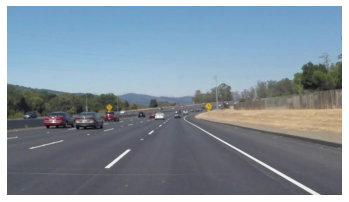

In [448]:
# Load one image to be detected
import matplotlib.image as mplimg
from matplotlib import pyplot as plt                    
img = mplimg.imread('./data/test_images/solidWhiteCurve.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

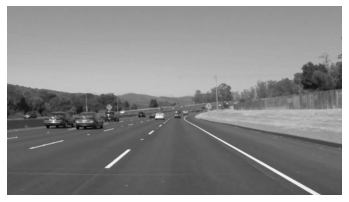

In [449]:
# Gray Scale Transformation
import cv2
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# if you write like following code, the image would be shown still with RGB, so it should be added with (cmap = "gray")
# plt.imshow(gray)
# plt.show()

# the gray image as input to the Canny Edge Detection
plt.imshow(gray, cmap = "gray")
plt.axis('off')
plt.show()

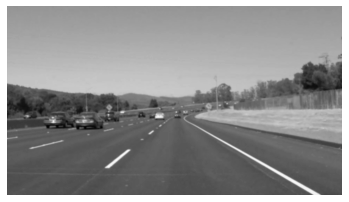

In [450]:
# Gaussian Smoothing
# pick up the kernel size of Gaussian Filter with 5
# more larger the kernel size is, more blur the image would be, which causes in the less high frequency section to pass
gf_kernel = 5
gf_gray = cv2.GaussianBlur(gray, (gf_kernel, gf_kernel), 0)
plt.imshow(gf_gray, cmap = "gray")
plt.axis('off')
plt.show()

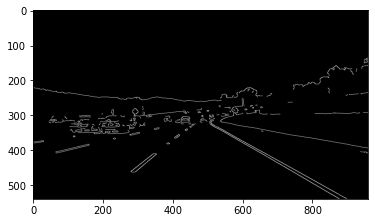

In [451]:
# Canny Edge Detection
# set minVal and maxVal respectively for second and third arguments for cv.Canny()
# the larger the value, less lines would be passed
import numpy as np
minVal = 100
maxVal = 150
edges = cv2.Canny(gf_gray, minVal, maxVal)
plt.imshow(edges, cmap = "gray")
plt.show()

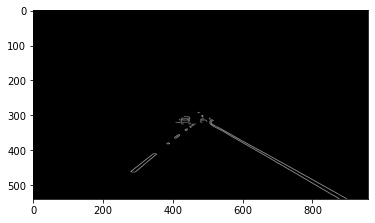

In [452]:
# ROI(region of interest) Based Edge Filtering
# remove the useless elements beside lanes
def ROI(edges):
    height = edges.shape[0]
    width = edges.shape[1]
    # define Triangular ROI: when the values will change according to the place of camera mounts
    triangle = np.array([[(100, height), (width, height), (width-500, int(height/1.9))]])
    # create full black area same as that of input image
    black_edges = np.zeros_like(edges)
    # put the triangular shape on top of our black image to create a mask
    mask = cv2.fillPoly(black_edges, triangle, 255)
    # apply mask on the original image
    masked_edges = cv2.bitwise_and(edges, mask)
    return masked_edges

edges_ROI = ROI(edges)
plt.imshow(edges_ROI, cmap = 'gray')
plt.show()

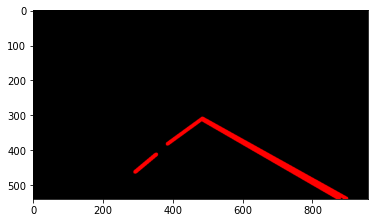

In [453]:
# in order to remove the block on the image(edges), Hough Transportation should be used

# void cv::HoughLinesP(
# InputArray 	image,
# OutputArray 	lines,
# double 	rho,
# double 	theta,
# int 	threshold,
# double 	minLineLength = 0,
# double 	maxLineGap = 0 
# )

# Parameters
# image	8-bit, single-channel binary source image. The image may be modified by the function.
# lines	Output vector of lines. Each line is represented by a 4-element vector (x1,y1,x2,y2) , where (x1,y1) and (x2,y2) are the ending points of each detected line segment.
# rho	Distance resolution of the accumulator in pixels.
# theta	Angle resolution of the accumulator in radians.
# threshold	Accumulator threshold parameter. Only those lines are returned that get enough votes ( >threshold ).
# minLineLength	Minimum line length. Line segments shorter than that are rejected.
# maxLineGap	Maximum allowed gap between points on the same line to link them.

def get_hough_lines(edges_ROI):
    hough_lines =  cv2.HoughLinesP(edges_ROI, rho = 1.0, theta = np.pi / 180, threshold = 40, minLineLength = 50, maxLineGap = 20)
    return hough_lines

# Line Display
def displayLines(img, hough_lines):
    if hough_lines is not None:
        for line in hough_lines:
            x1, y1, x2, y2 = line.reshape(4) # converting to 1d array
            cv2.line(img, (x1, y1,), (x2, y2), color = (255, 0, 0), thickness = 10)
    return line_img

hough_lines = get_hough_lines(edges_ROI)
line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)

line_img = displayLines(line_img, hough_lines)
plt.imshow(line_img)
plt.show()

In [ ]:
# smoothing the detected curves
# combine multi curves
